In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import scipy.stats as sps

# Load the data into data frames
df = pd.read_csv("2011_London.csv")

In [71]:
# The dataset shows house prices and crime rates in 32 areas in London in 2011.

# Let's visualise the first few rows of each data set:

df.head()

,Area,House_prices_2011,Burglary_rate,Criminal_damage_rate,Drugs_rate,Fraud_or_Forgery_rate,Other_Notifiable_Offences_rate,Robbery_rate,Sexual_offences_rate,Theft_and_Handling_rate,Violence_Against_the_Person_rate
0,Barking and Dagenham,"170,000",0.0127,0.0118,0.0054,0.0061,0.0019,0.0057,0.0014,0.0337,0.0220
1,Barnet,"324,000",0.0138,0.0070,0.0035,0.0044,0.0008,0.0033,0.0009,0.0284,0.0119
2,Bexley,"215,000",0.0064,0.0075,0.0041,0.0028,0.0007,0.0016,0.0007,0.0172,0.0120
3,Brent,"300,000",0.0121,0.0077,0.0149,0.0041,0.0015,0.0071,0.0012,0.0281,0.0235
4,Bromley,"275,000",0.0103,0.0087,0.0035,0.0046,0.0007,0.0024,0.0008,0.0255,0.0151


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            32 non-null     object 
 1   house_price     32 non-null     float64
 2   burglary        32 non-null     float64
 3   criminal        32 non-null     float64
 4   drugs           32 non-null     float64
 5   fraud_forgery   32 non-null     float64
 6   other_offences  32 non-null     float64
 7   robbery         32 non-null     float64
 8   sexual          32 non-null     float64
 9   theft           32 non-null     float64
 10  violence        32 non-null     float64
dtypes: float64(10), object(1)
memory usage: 85.6+ KB


In [72]:
#Checking the correlation between variables

print(df.corr('spearman'))

                                  Burglary_rate  Criminal_damage_rate  \
Burglary_rate                          1.000000              0.330404   
Criminal_damage_rate                   0.330404              1.000000   
Drugs_rate                             0.301978              0.459992   
Fraud_or_Forgery_rate                  0.252826              0.385937   
Other_Notifiable_Offences_rate         0.292565              0.649216   
Robbery_rate                           0.430763              0.507476   
Sexual_offences_rate                   0.164183              0.673953   
Theft_and_Handling_rate                0.345405              0.443704   
Violence_Against_the_Person_rate       0.337066              0.678550   

                                  Drugs_rate  Fraud_or_Forgery_rate  \
Burglary_rate                       0.301978               0.252826   
Criminal_damage_rate                0.459992               0.385937   
Drugs_rate                          1.000000            

Text(0.5, 1.0, 'Correlation Matrix')

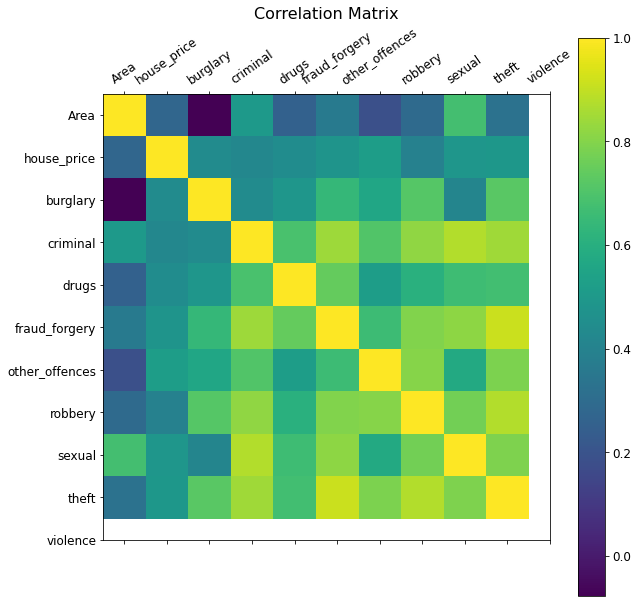

In [65]:
#In regression, collinearity is the problem when two variables are highly correlated and therefore contain similar information about the variance within the dataset. 
#Colinearity among variables can be detected by creating a correlation matrix.
#multicollinearity emerges when three or more variables, which are highly correlated, are included in a model. It can emerge even when each pair of variables involved are not colinear.
#Check the colinearity between variables using a correlation matrix as below

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=12, rotation=35)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
#It looks like some variables' correlation is above 0.75, they may highly related. 
#However, we cannot remove them directly.

In [73]:
#Dealing with multicollinearity
#Using VIF to deal with multicollinearity
#If there are a large number of predictor variables, it is very difficult to manually test multicollinearity between them. 
#Here we use VIF to automatically deal with multicollinearity.
#The Variance Inflation Factor (VIF) is a measure of multicolinearity among predictors within a multiple regression task. 

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        vif_df = vif_df.drop('const') 
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break
    return df

In [74]:
print(df)

                      Area House_prices_2011  Burglary_rate  \
0     Barking and Dagenham           170,000         0.0127   
1                   Barnet           324,000         0.0138   
2                   Bexley           215,000         0.0064   
3                    Brent           300,000         0.0121   
4                  Bromley           275,000         0.0103   
5                   Camden           480,000         0.0156   
6                  Croydon           220,000         0.0128   
7                   Ealing           293,000         0.0114   
8                  Enfield           240,000         0.0119   
9                Greenwich           250,000         0.0100   
10                 Hackney           310,000         0.0094   
11  Hammersmith and Fulham           465,000         0.0139   
12                Haringey           302,000         0.0142   
13                  Harrow           295,000         0.0109   
14                Havering           220,000         0.

In [80]:
df_new = drop_column_using_vif_(df.drop('House_prices_2011', axis=1))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [15]:
# This package will allow for multilinear regression. It can also be used for simple linear regression.

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [53]:
df = df.rename(columns = {'House_prices_2011':'house_price',
                          'Burglary_rate':"burglary",
                          'Criminal_damage_rate':'criminal',
                          'Drugs_rate':'drugs',
                          'Fraud_or_Forgery_rate':'fraud_forgery',
                          'Other_Notifiable_Offences_rate':'other_offences',
                          'Robbery_rate':"robbery",
                          'Sexual_offences_rate':'sexual',
                          'Theft_and_Handling_rate':'theft',
                          'Violence_Against_the_Person_rate':'violence'})


multi_regression_model = smf.ols(formula='house_price ~ burglary + criminal + drugs + fraud_forgery + other_offences + robbery +sexual + theft + violence',data=df).fit()


print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4.675
Date:                Mon, 07 Dec 2020   Prob (F-statistic):            0.00151
Time:                        18:59:24   Log-Likelihood:                -403.35
No. Observations:                  32   AIC:                             826.7
Df Residuals:                      22   BIC:                             841.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.371e+05   1.37e+05      3.

In [48]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6, beta_7, beta_8, beta_9 = multi_regression_model.params
rsq                    = multi_regression_model.rsquared
pval_0, pval_1, pval_2, pval_3, pval_4, pval_5, pval_6, pval_7, pval_8, pval_9 = multi_regression_model.pvalues

print("y =", round(beta_1,3), "x1 +", round(beta_2,3), "x2 +", round(beta_0,3), "x3 +", round(beta_3, 3), "x4 +", round(beta_4, 3), "x5 +", round(beta_5, 3), "x6 +", round(beta_6, 3), "x7 +", round(beta_7, 3), "x8 +", round(beta_8, 3), "x9 +", round(beta_9, 3))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))
print("p-value_4 = ", round(pval_4,3))
print("p-value_5 = ", round(pval_5,3))
print("p-value_6 = ", round(pval_6,3))
print("p-value_7 = ", round(pval_7,3))
print("p-value_8 = ", round(pval_8,3))
print("p-value_9 = ", round(pval_9,3))

y = 4933804.008 x1 + -24361999.156 x2 + 437050.828 x3 + -443487.852 x4 + -14790813.559 x5 + -30464601.687 x6 + -3801543.469 x7 + -54370405.594 x8 + 4716236.749 x9 + 2167494.241
R^2     =  0.6566434019558949
p-value_1 =  0.667
p-value_2 =  0.302
p-value_3 =  0.958
p-value_4 =  0.383
p-value_5 =  0.687
p-value_6 =  0.797
p-value_7 =  0.676
p-value_8 =  0.003
p-value_9 =  0.829


In [63]:
multi_regression_model = sm.formula.ols('house_price ~ burglary + criminal + drugs + fraud_forgery + other_offences + robbery +sexual + theft + violence', df).fit()


print(multi_regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     4.675
Date:                Tue, 08 Dec 2020   Prob (F-statistic):            0.00151
Time:                        14:13:02   Log-Likelihood:                -403.35
No. Observations:                  32   AIC:                             826.7
Df Residuals:                      22   BIC:                             841.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.371e+05   1.37e+05      3.

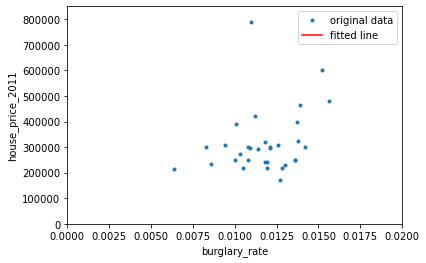

y = nan x + nan
Rsq =  nan
p-value =  nan


In [35]:
# This is a multi_regression of burglary_rate against house_price_2011:

X = d1['burglary']
Y = d1['house_price']

plt.xlabel('burglary_rate')
plt.ylabel('house_price_2011')

a = plt.plot(X,Y,'.', label='original data')
plt.xlim(0,0.02)
plt.ylim(0,850000)

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label = 'fitted line') # Plot the regression line.

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)